In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import preprocessor as p

from IPython import display
from textblob import TextBlob
import pickle

%matplotlib inline
plt.style.use('fivethirtyeight')

In [31]:
handles = pd.read_csv("statsocial_political_journalists.csv")

del handles['Unnamed: 7']
del handles['Unnamed: 11']

handles = handles['Username'].values.tolist()

In [32]:
with open("handles.pkl", 'rb') as picklefile: 
    handles = pickle.load(picklefile)

In [33]:
len(handles)

1639

In [34]:
import requests
from requests_oauthlib import OAuth1

#OAuth ~ simple way to to publish & interact with data

In [35]:
# Importing our Config

# import cnfg
import os
# config = cnfg.load(".twitter_config")

oauth = OAuth1(os.environ['TWITTER_API_KEY'],
               os.environ["TWITTER_API_SECRET"],
               os.environ["TWITTER_ACCESS_TOKEN"],
               os.environ["TWITTER_ACCESS_TOKEN_SECRET"])

In [36]:
# This "user_timeline" url tells the API to get the tweets of the user associated with the app.
response = requests.get("https://api.twitter.com/1.1/statuses/user_timeline.json",
                        auth=oauth)

# Note that we're using the "requests" library
tweets = response.json()

In [37]:
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(os.environ['TWITTER_API_KEY'],
                           os.environ["TWITTER_API_SECRET"])
    auth.set_access_token(os.environ["TWITTER_ACCESS_TOKEN"],
                          os.environ["TWITTER_ACCESS_TOKEN_SECRET"])
    api=tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print("...%s tweets downloaded so far" % (len(alltweets)))

    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, p.clean(tweet.text)] for tweet in alltweets]

    #write the csv
    with open('tweets/%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)

    pass

In [10]:
import os
cwd = os.getcwd()
cwd

'/Users/jeremy/ds/metis/metisgh/chi17_ds2/student_submissions/projects/Fletcher'

In [15]:
handles[1000]

'edroso'

In [38]:
handles[0]

'borowitzreport'

In [44]:
get_all_tweets(handles[7])

TweepError: Not authorized.

In [19]:
edroso = pd.read_csv("tweets/edroso_tweets.csv")['text']
edroso[2]

'My latest fan, wanna follow? (Warning: He likes to talk about sheep!)'

In [20]:
i = 1
for handle in handles[i-1:]:
    print(handle, ' ',i,'/',len(handles))
    try:
        get_all_tweets(handle)
        handles.remove(handle)
    except tweepy.TweepError:
        time.sleep(60 * 15)
        continue 
    except:
        print("(╯°□°）╯︵ ┻━┻")
    i+=1
    display.clear_output(wait=True)
    time.sleep(5)

JenniferPreston   3 / 1639


KeyboardInterrupt: 

In [16]:
handles

['borowitzreport',
 'postreid',
 'JenniferPreston',
 'nytimescollins',
 'sdoocy',
 'ShawnaNBCNews',
 'stefanjbecket',
 'jennafnc',
 'gatewaypundit',
 'LizMair',
 'thejuanwilliams',
 'stevebenen',
 'owillis',
 'jackgraycnn',
 'PamelaGeller',
 'davidmuir',
 'stupolitics',
 'vplus',
 'feministabulous',
 'esqpolitics',
 'grahamdavida',
 'poniewozik',
 'lexim',
 'JustinElliott',
 'marincogan',
 'Atrios',
 'bethreinhard',
 'shushwalshe',
 'michelleinbklyn',
 'judgejeanine',
 'amandamarcotte',
 'michaelroston',
 'RickHertzberg',
 'marcacaputo',
 'spiegelpeter',
 'joshledermanap',
 'LisaDNews',
 'katebolduan',
 'jamestaranto',
 'TimothyNoah1',
 'daaronovitch',
 'carol_e_lee',
 'scottpelley',
 'jmsummers',
 'michaelbarone',
 'chrislicht',
 'evanchill',
 'jasondhorowitz',
 'contessabrewer',
 'mysterypollster',
 'normative',
 'vodkapundit',
 'pbump',
 'jricole',
 'jenniferjjacobs',
 'patrickwintour',
 'jtLOL',
 'davidnakamura',
 'aceofspadeshq',
 'juliebosman',
 'ishasesaycnn',
 'heminator',
 'sa

In [17]:
with open('handles.pkl', 'wb') as picklefile:
    pickle.dump(handles, picklefile)


In [23]:
handles[155]

'JenniferPreston'

In [27]:
get_all_tweets(handles[156])

getting tweets before 260762414071554051
...400 tweets downloaded so far
getting tweets before 19136368349286400
...600 tweets downloaded so far
getting tweets before 4562435557
...682 tweets downloaded so far
getting tweets before 1181990018
...682 tweets downloaded so far


In [11]:
handles[72]

'costareports'

In [10]:
test = pd.read_csv("tweets/costareports_tweets.csv")
test

,id,created_at,text
0,867841459805982721,2017-05-25 20:35:02,b'RT @GlennThrush: Lieberman has officially wi...
1,867830898678521856,2017-05-25 19:53:04,"b'RT @DavidNakamura: Tom Hanks, and Spielberg..."
2,867580331293118464,2017-05-25 03:17:24,b'RT @AP: BREAKING: Fox News says crew saw Mon...
3,867514043992616960,2017-05-24 22:54:00,"b'""But according to the FBI\xe2\x80\x99s own a..."
4,867512458201755650,2017-05-24 22:47:42,b'RT @washingtonpost: Former Trump campaign ch...
5,867511737007968256,2017-05-24 22:44:50,b'RT @mkraju: NEWS: Sessions did NOT disclose ...
6,867435427598409729,2017-05-24 17:41:36,"b'""I don\'t know how we get to 50 (votes) at t..."
7,867217925572263937,2017-05-24 03:17:20,b'RT @richarddeitsch: This @frontlinepbs doc o...
8,867217143313641472,2017-05-24 03:14:13,"b""RT @frontlinepbs: 7 days into Trump's presid..."
9,867216840740753409,2017-05-24 03:13:01,b'RT @priyankaboghani: Trump\'s inaugural spee...


In [11]:
def sentiment_plot(tweet_history):
    polarity = np.zeros(len(tweet_history))
    subjectivity = np.zeros(len(tweet_history))

    for tweet in range(len(tweet_history)):
        polarity[tweet] = TextBlob(tweet_history[tweet]).sentiment.polarity
        subjectivity[tweet] = TextBlob(tweet_history[tweet]).sentiment.subjectivity

    print('µ polarity: ',np.mean(polarity).round(2),' σ polarity: ',np.std(polarity).round(2),' µ subjectivity: ',np.mean(subjectivity).round(2),' σ subjectivity: ',np.std(subjectivity).round(2))
    plt.figure(figsize=(12,8))
    plt.plot(polarity, subjectivity, "o", alpha =.2)
    plt.xlabel("polarity")
    plt.ylabel("subjectivity")

In [12]:
nate = pd.read_csv("tweets/NateSilver538_tweets.csv")

megan = pd.read_csv("tweets/megynkelly_tweets.csv")

arianna = pd.read_csv("tweets/ariannahuff_tweets.csv")

nate = nate['text']

megan = megan['text']

arianna = arianna['text']

µ polarity:  0.1  σ polarity:  0.27  µ subjectivity:  0.4  σ subjectivity:  0.3


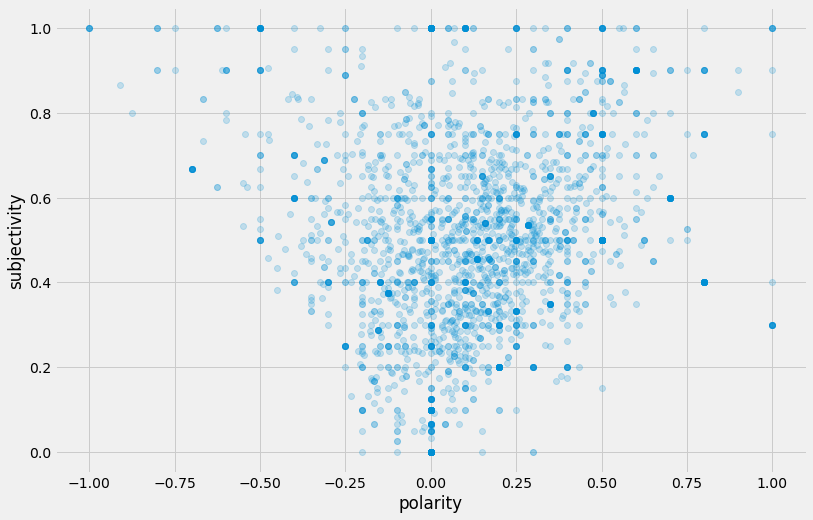

In [13]:
sentiment_plot(nate)

µ polarity:  0.11  σ polarity:  0.28  µ subjectivity:  0.35  σ subjectivity:  0.32


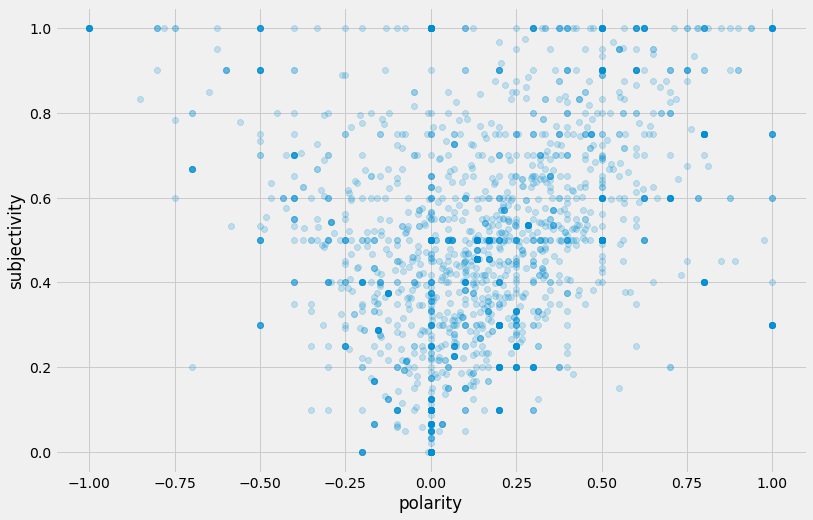

In [14]:
sentiment_plot(megan)

µ polarity:  0.11  σ polarity:  0.29  µ subjectivity:  0.32  σ subjectivity:  0.33


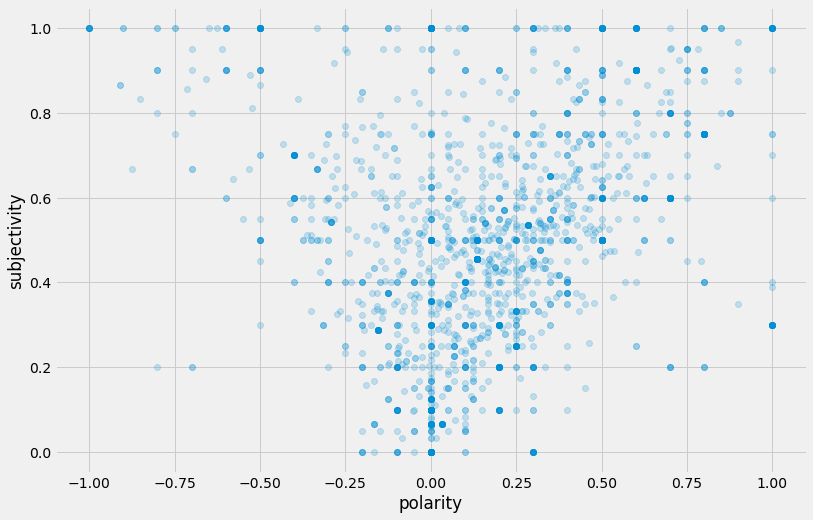

In [15]:
sentiment_plot(arianna)